# Decision Tree

## Introduction
A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.
In decision analysis, a decision tree and the closely related influence diagram are used as a visual and analytical decision support tool, where the expected values (or expected utility) of competing alternatives are calculated.
A decision tree consists of three types of nodes: 
1.	Decision nodes – typically represented by squares
2.	Chance nodes – typically represented by circles
3.	End nodes – typically represented by triangles

![avatar](https://miro.medium.com/max/1174/1*7wRAwQjvOGXNUx753F_-Vg.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score

from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,classification_report

from sklearn.tree import plot_tree

%matplotlib inline

In [2]:
df_train = pd.read_csv('dataset/train.csv')

df_test = pd.read_csv('dataset/test.csv') 

df_y_test = pd.read_csv('dataset/gender_submission.csv')

In [3]:
df_test['Survived'] = df_y_test['Survived']

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


<AxesSubplot:>

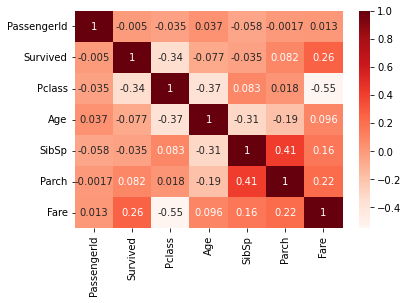

In [6]:
sns.heatmap(df_train.corr(), annot=True,cmap='Reds')

<AxesSubplot:>

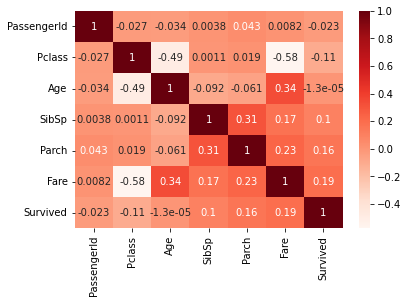

In [7]:
sns.heatmap(df_test.corr(), annot=True,cmap='Reds')

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
pd.DataFrame([df_train.corr()['Survived'].sort_values()])

,Pclass,Age,SibSp,PassengerId,Parch,Fare,Survived
Survived,-0.338481,-0.077221,-0.035322,-0.005007,0.081629,0.257307,1.0


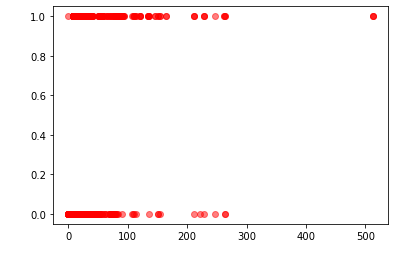

In [10]:
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        }

#plt.style.use('dark_background')

fig, ax = plt.subplots()

X=df_train['Fare']
y=df_train['Survived']


ax.set_xlabel('Fare', fontdict=font)
ax.set_ylabel('Survived', fontdict=font)

  
plt.plot(X,y, 'ro', alpha=0.5)

In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
100*(df_train.isnull().sum()/len(df_train))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [14]:
nan_percent= missing_percent(df_train)

In [15]:
nan_percent

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Embarked'), Text(1, 0, 'Age'), Text(2, 0, 'Cabin')])

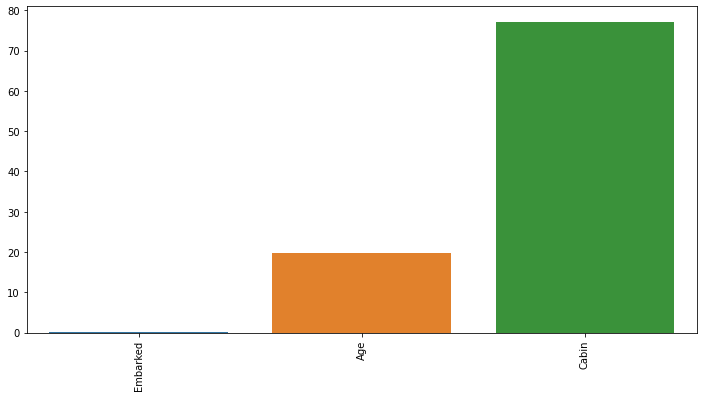

In [16]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [17]:
nan_percent[nan_percent<1].index

Index(['Embarked'], dtype='object')

In [18]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
df_train= df_train.dropna(axis=0, subset=['Embarked'])

(array([0, 1]), [Text(0, 0, 'Age'), Text(1, 0, 'Cabin')])

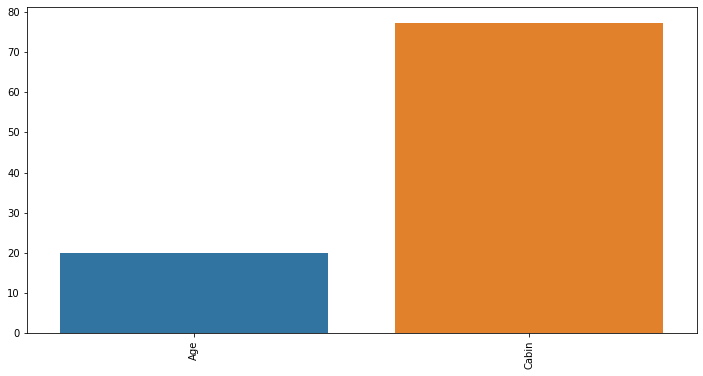

In [20]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [21]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

(array([0]), [Text(0, 0, 'Cabin')])

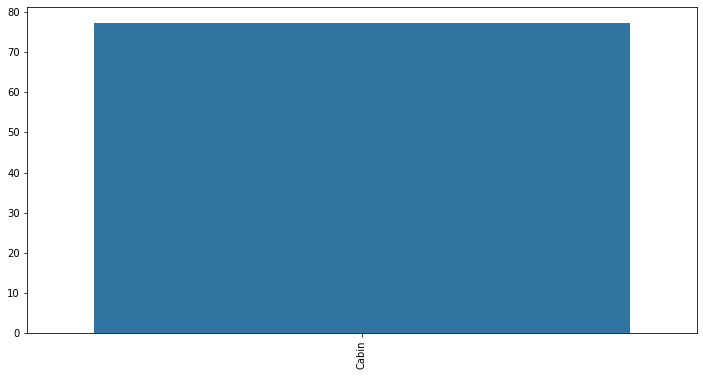

In [22]:
nan_percent= missing_percent(df_train)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [23]:
df_train=df_train.drop(['Cabin'], axis=1)

In [24]:
nan_percent= missing_percent(df_train)
nan_percent

Series([], dtype: float64)

In [25]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [26]:
pd.DataFrame([df_test.corr()['Survived'].sort_values()])

,Pclass,PassengerId,Age,SibSp,Parch,Fare,Survived
Survived,-0.108615,-0.023245,-0.000013,0.099943,0.15912,0.191514,1.0


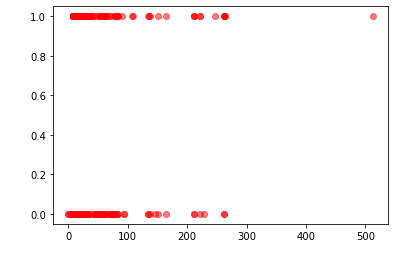

In [27]:
fig, ax = plt.subplots()

X=df_test['Fare']
y=df_test['Survived']


ax.set_xlabel('Fare', fontdict=font)
ax.set_ylabel('Survived', fontdict=font)

  
plt.plot(X,y, 'ro', alpha=0.5)

In [28]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [29]:
100*(df_test.isnull().sum()/len(df_test))

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

In [30]:
nan_percent= missing_percent(df_test)
nan_percent

Fare      0.239234
Age      20.574163
Cabin    78.229665
dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Fare'), Text(1, 0, 'Age'), Text(2, 0, 'Cabin')])

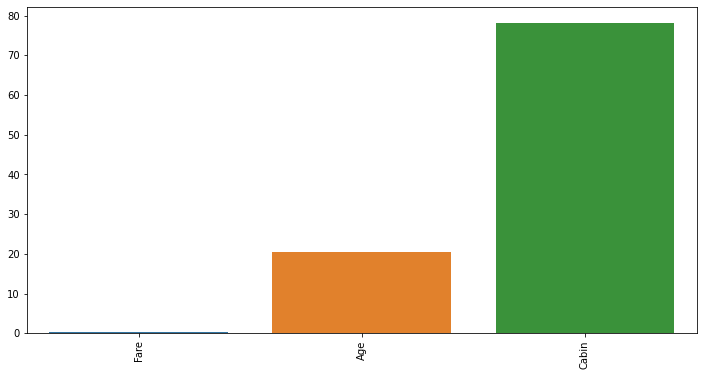

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [32]:
nan_percent[nan_percent<1].index

Index(['Fare'], dtype='object')

In [33]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [34]:
df_test= df_test.dropna(axis=0, subset=['Fare'])

(array([0, 1]), [Text(0, 0, 'Age'), Text(1, 0, 'Cabin')])

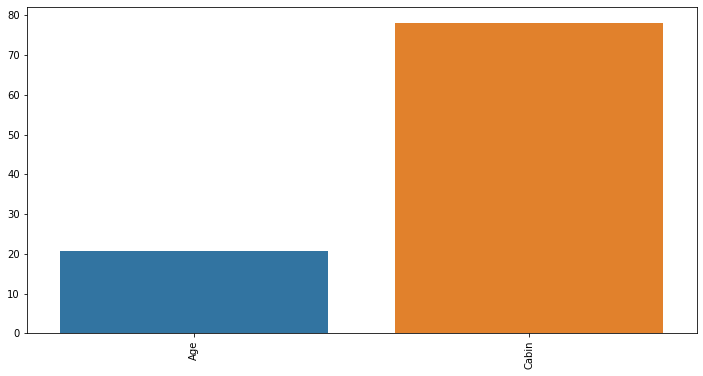

In [35]:
nan_percent= missing_percent(df_test)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)


In [36]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
Survived         0
dtype: int64

(array([0]), [Text(0, 0, 'Cabin')])

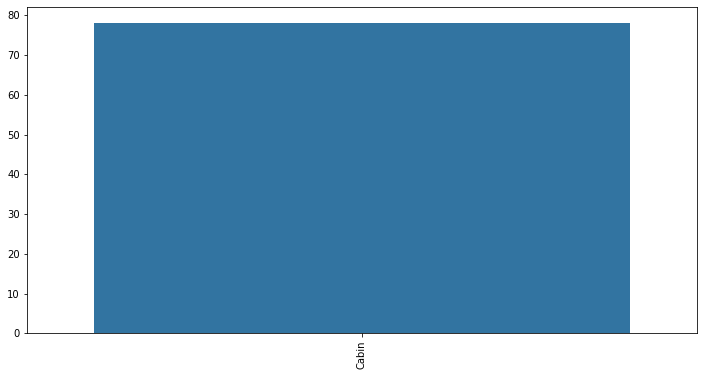

In [37]:
nan_percent= missing_percent(df_test)

plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [38]:
df_test=df_test.drop(['Cabin'], axis=1)

In [39]:
nan_percent= missing_percent(df_test)
nan_percent

Series([], dtype: float64)

In [40]:
df_train.drop(['Name','Ticket', 'PassengerId'], axis = 1, inplace=True)
df_test.drop(['Name','Ticket', 'PassengerId'], axis = 1, inplace=True)

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [42]:
df_train.shape

(889, 8)

In [43]:
df_train['Survived'] = df_train['Survived'].apply(str)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    object 
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.5+ KB


In [45]:
df_train['Pclass'] = df_train['Pclass'].apply(str)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    object 
 1   Pclass    889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.5+ KB


In [47]:
df_train_num = df_train.select_dtypes(exclude='object')
df_train_obj = df_train.select_dtypes(include='object')

In [48]:
df_train_obj.drop('Survived', axis = 1, inplace=True)

/Users/xiehaoyang/opt/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
df_train_obj = pd.get_dummies(df_train_obj, drop_first=True)

In [50]:
Final_train_df = pd.concat([df_train_num, df_train_obj,df_train['Survived']], axis=1)

Final_train_df

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived
0,22.0,1,0,7.2500,0,1,1,0,1,0
1,38.0,1,0,71.2833,0,0,0,0,0,1
2,26.0,0,0,7.9250,0,1,0,0,1,1
3,35.0,1,0,53.1000,0,0,0,0,1,1
4,35.0,0,0,8.0500,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1,0,1,0
887,19.0,0,0,30.0000,0,0,0,0,1,1
888,28.0,1,2,23.4500,0,1,0,0,1,0
889,26.0,0,0,30.0000,0,0,1,0,0,1


In [51]:
Final_train_df.shape

(889, 10)

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
 7   Survived  417 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


In [53]:
df_test.shape

(417, 8)

In [54]:
df_test['Survived'] = df_test['Survived'].apply(str)

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
 7   Survived  417 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.3+ KB


In [56]:
df_test['Pclass'] = df_test['Pclass'].apply(str)

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    object 
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
 7   Survived  417 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 29.3+ KB


In [58]:
df_test_num = df_test.select_dtypes(exclude='object')
df_test_obj = df_test.select_dtypes(include='object')

In [59]:
df_test_obj.drop('Survived', axis = 1, inplace=True)

/Users/xiehaoyang/opt/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
df_test_obj = pd.get_dummies(df_test_obj, drop_first=True)

In [61]:
Final_test_df = pd.concat([df_test_num, df_test_obj,df_test['Survived']], axis=1)

In [62]:
X_train=Final_train_df.drop('Survived', axis = 1)
y_train=Final_train_df['Survived']

X_test=Final_test_df.drop('Survived', axis = 1)
y_test = Final_test_df['Survived']

In [63]:
scaler= StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [64]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [65]:
model = DecisionTreeClassifier()

In [66]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred = model.predict(X_test)

In [68]:
confusion_matrix(y_test,y_pred)

array([[206,  59],
       [ 36, 116]])

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       265
           1       0.66      0.76      0.71       152

    accuracy                           0.77       417
   macro avg       0.76      0.77      0.76       417
weighted avg       0.78      0.77      0.78       417



In [70]:
model.feature_importances_

array([0.2579661 , 0.04282626, 0.02426178, 0.25878619, 0.00863722,
       0.08019059, 0.3089222 , 0.00428459, 0.01412507])

In [71]:
pd.DataFrame(index=X_train.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.257966
SibSp,0.042826
Parch,0.024262
Fare,0.258786
Pclass_2,0.008637
Pclass_3,0.080191
Sex_male,0.308922
Embarked_Q,0.004285
Embarked_S,0.014125


In [72]:
plt.figure(figsize=(10,10),dpi=300)
plot_tree(model)

[Text(875.5864070012019, 2211.0714285714284, 'X[6] <= 0.5\ngini = 0.472\nsamples = 889\nvalue = [549, 340]'),
 Text(390.41090745192304, 2103.214285714286, 'X[5] <= 0.5\ngini = 0.384\nsamples = 312\nvalue = [81, 231]'),
 Text(156.4903846153846, 1995.357142857143, 'X[0] <= 2.5\ngini = 0.101\nsamples = 168\nvalue = [9, 159]'),
 Text(119.23076923076923, 1887.5, 'X[2] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(104.32692307692307, 1779.642857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(134.1346153846154, 1779.642857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(193.75, 1887.5, 'X[3] <= 28.856\ngini = 0.092\nsamples = 166\nvalue = [8, 158]'),
 Text(163.94230769230768, 1779.642857142857, 'X[3] <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(149.03846153846155, 1671.7857142857142, 'X[0] <= 56.0\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(104.32692307692307, 1563.9285714285716, 'X[1] <= 0.5\ngini = 0.14\nsamples = 66\nvalue = [5, 61

In [73]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X_test.columns);

In [74]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [75]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       265
           1       0.91      0.53      0.67       152

    accuracy                           0.81       417
   macro avg       0.85      0.75      0.77       417
weighted avg       0.83      0.81      0.79       417





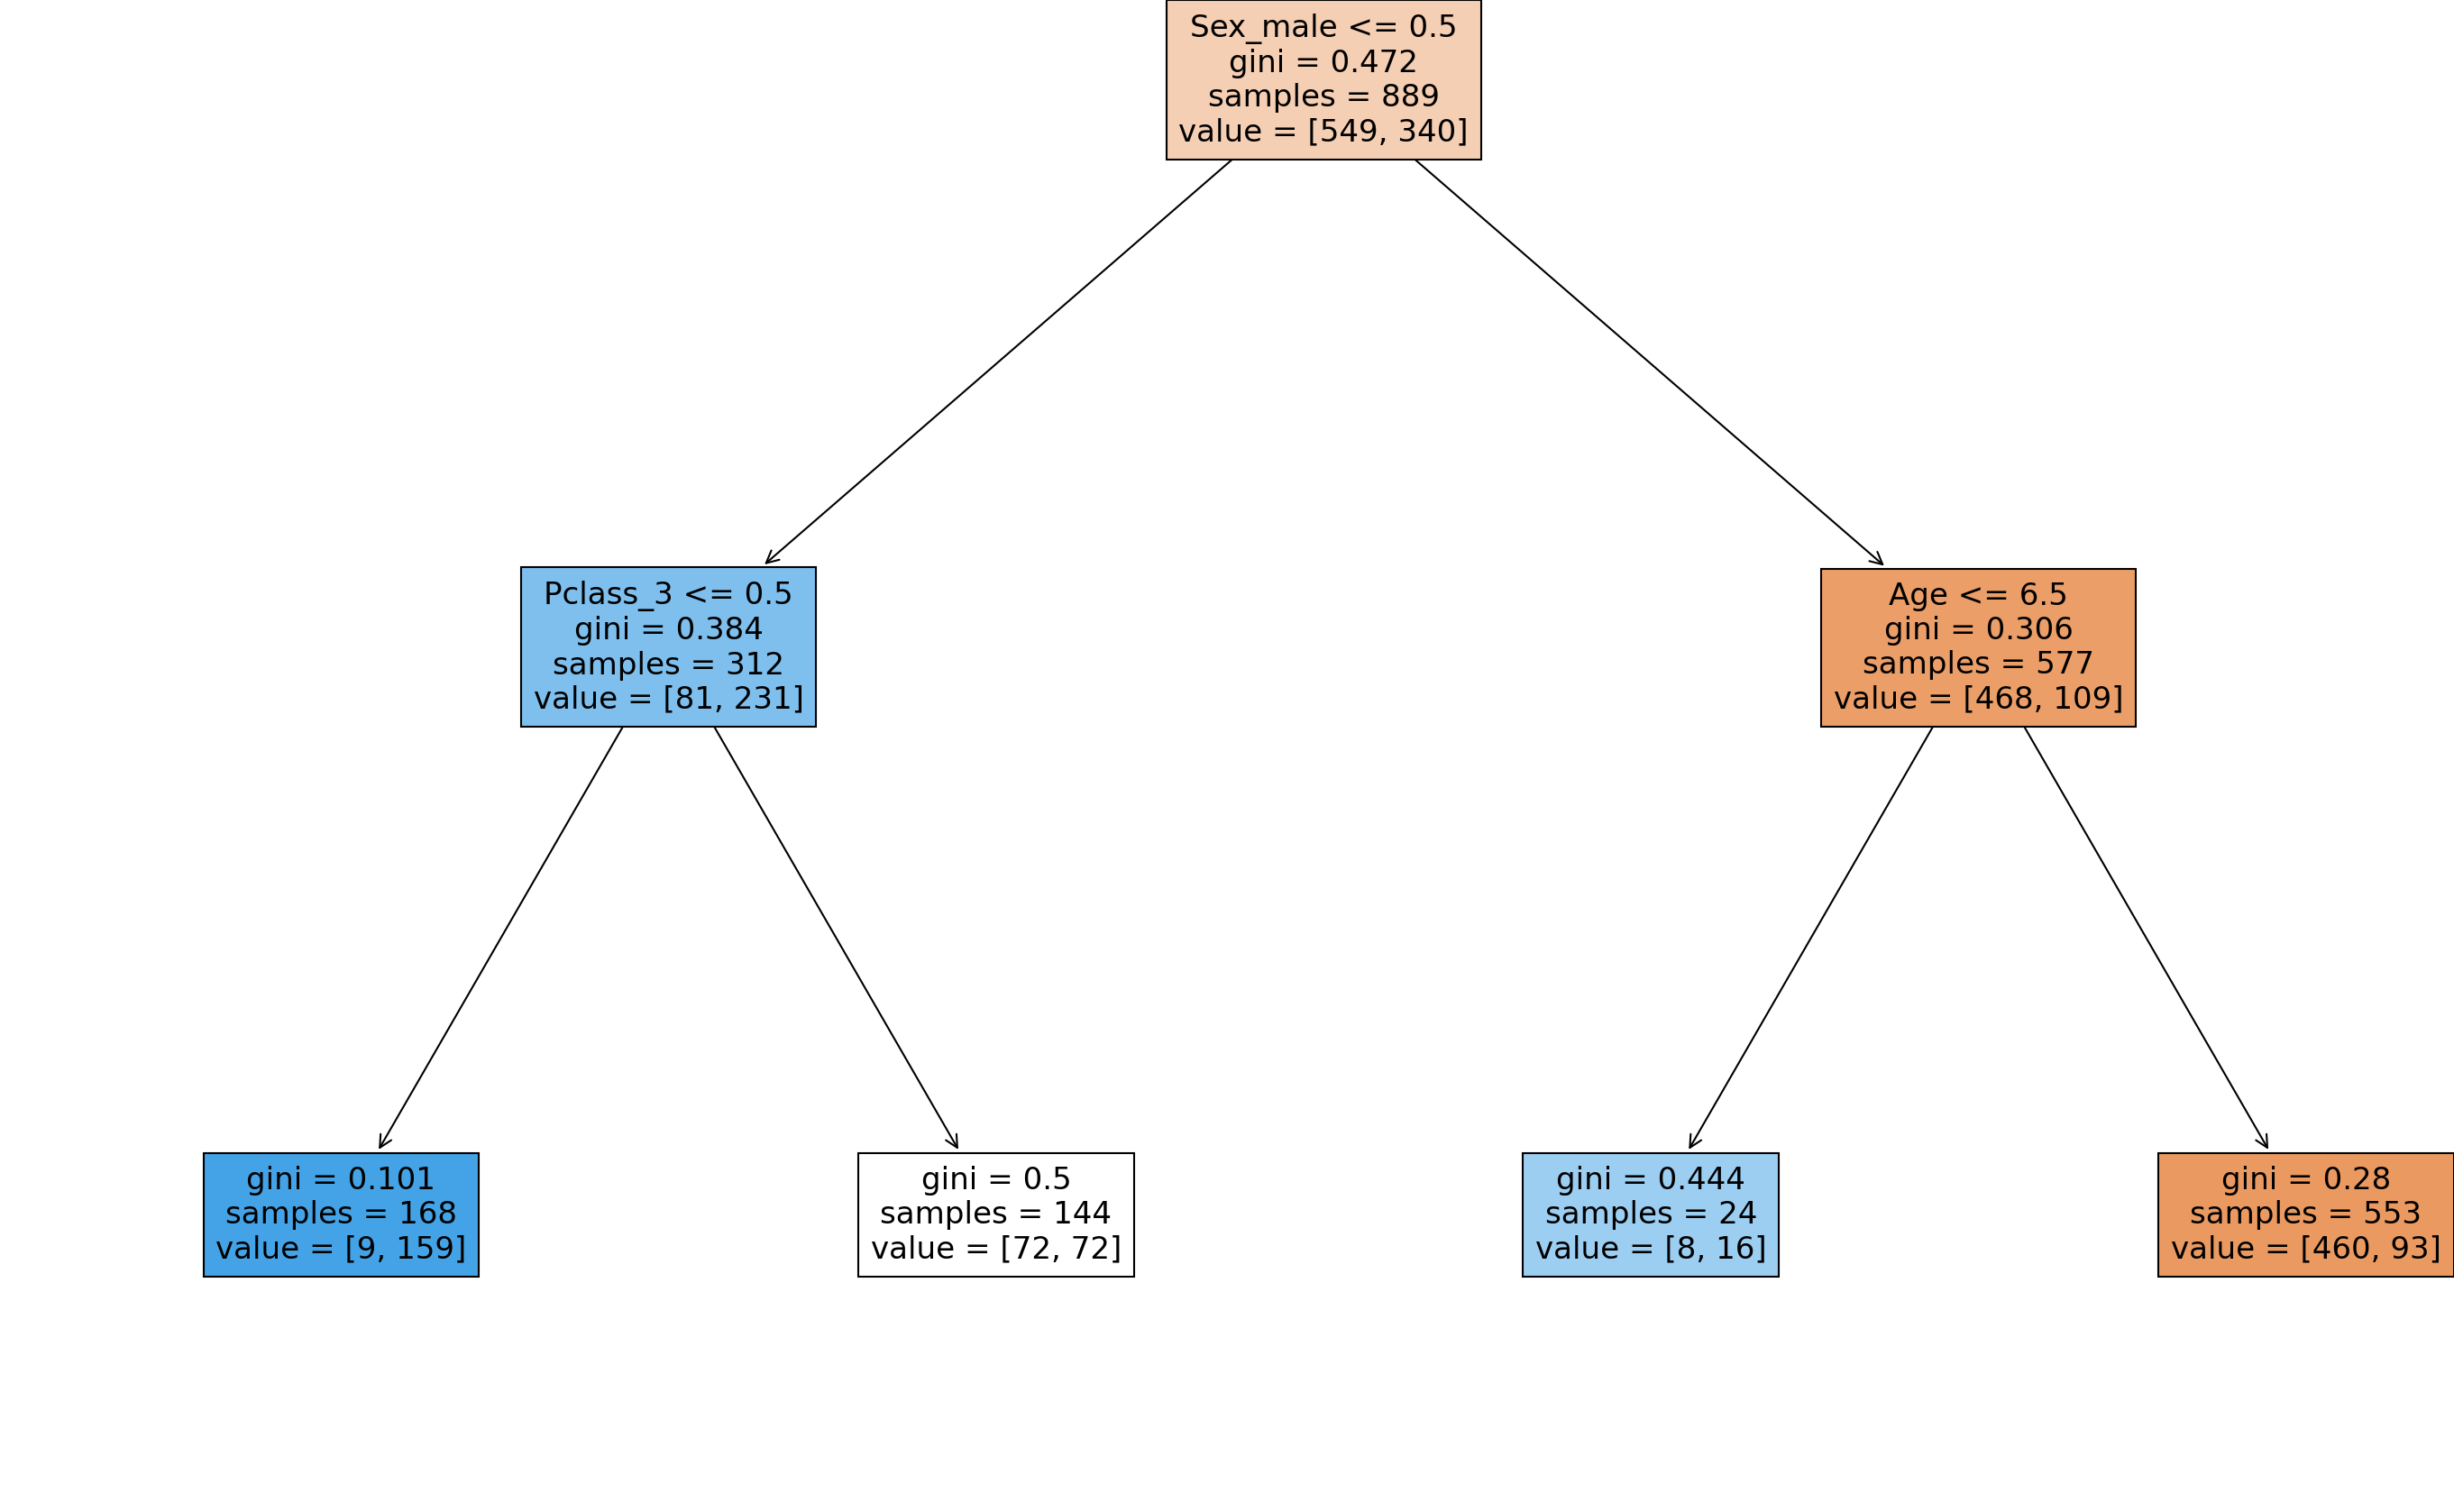

In [76]:
report_model(pruned_tree)

In [77]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       265
           1       1.00      0.53      0.69       152

    accuracy                           0.83       417
   macro avg       0.89      0.76      0.79       417
weighted avg       0.86      0.83      0.81       417





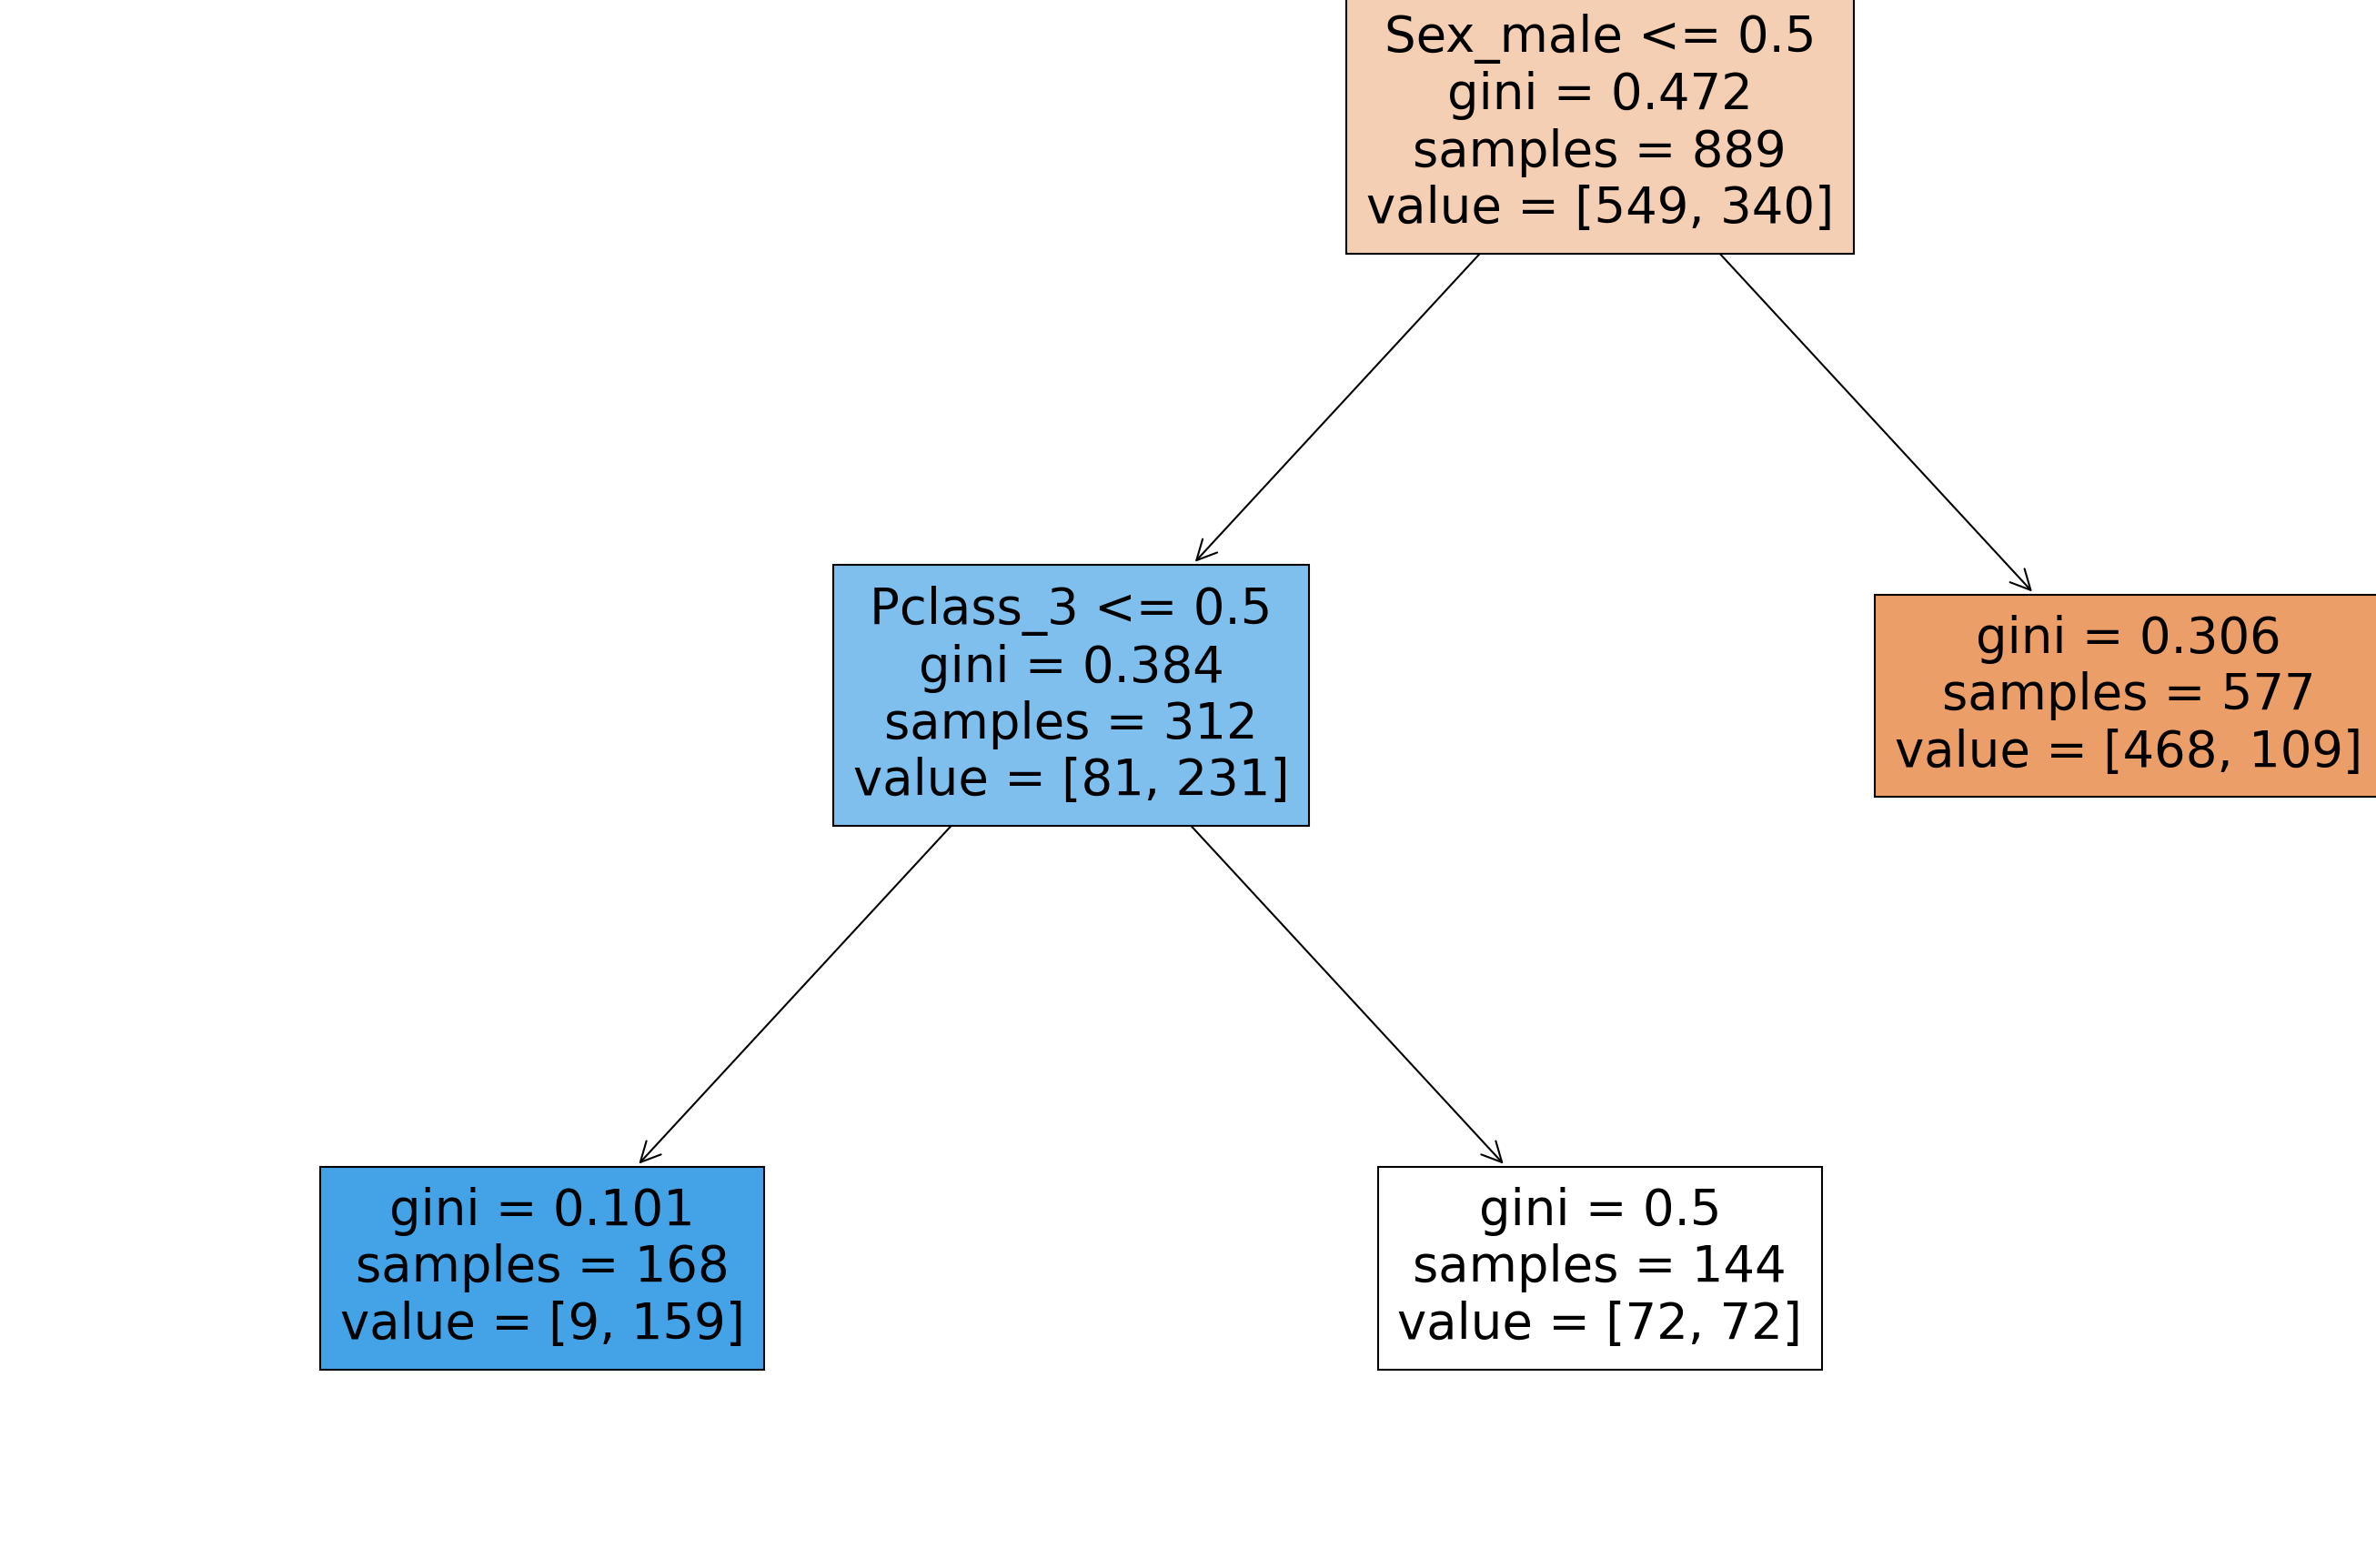

In [78]:
report_model(pruned_tree)

In [79]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       265
           1       0.66      0.75      0.70       152

    accuracy                           0.77       417
   macro avg       0.75      0.77      0.76       417
weighted avg       0.78      0.77      0.77       417





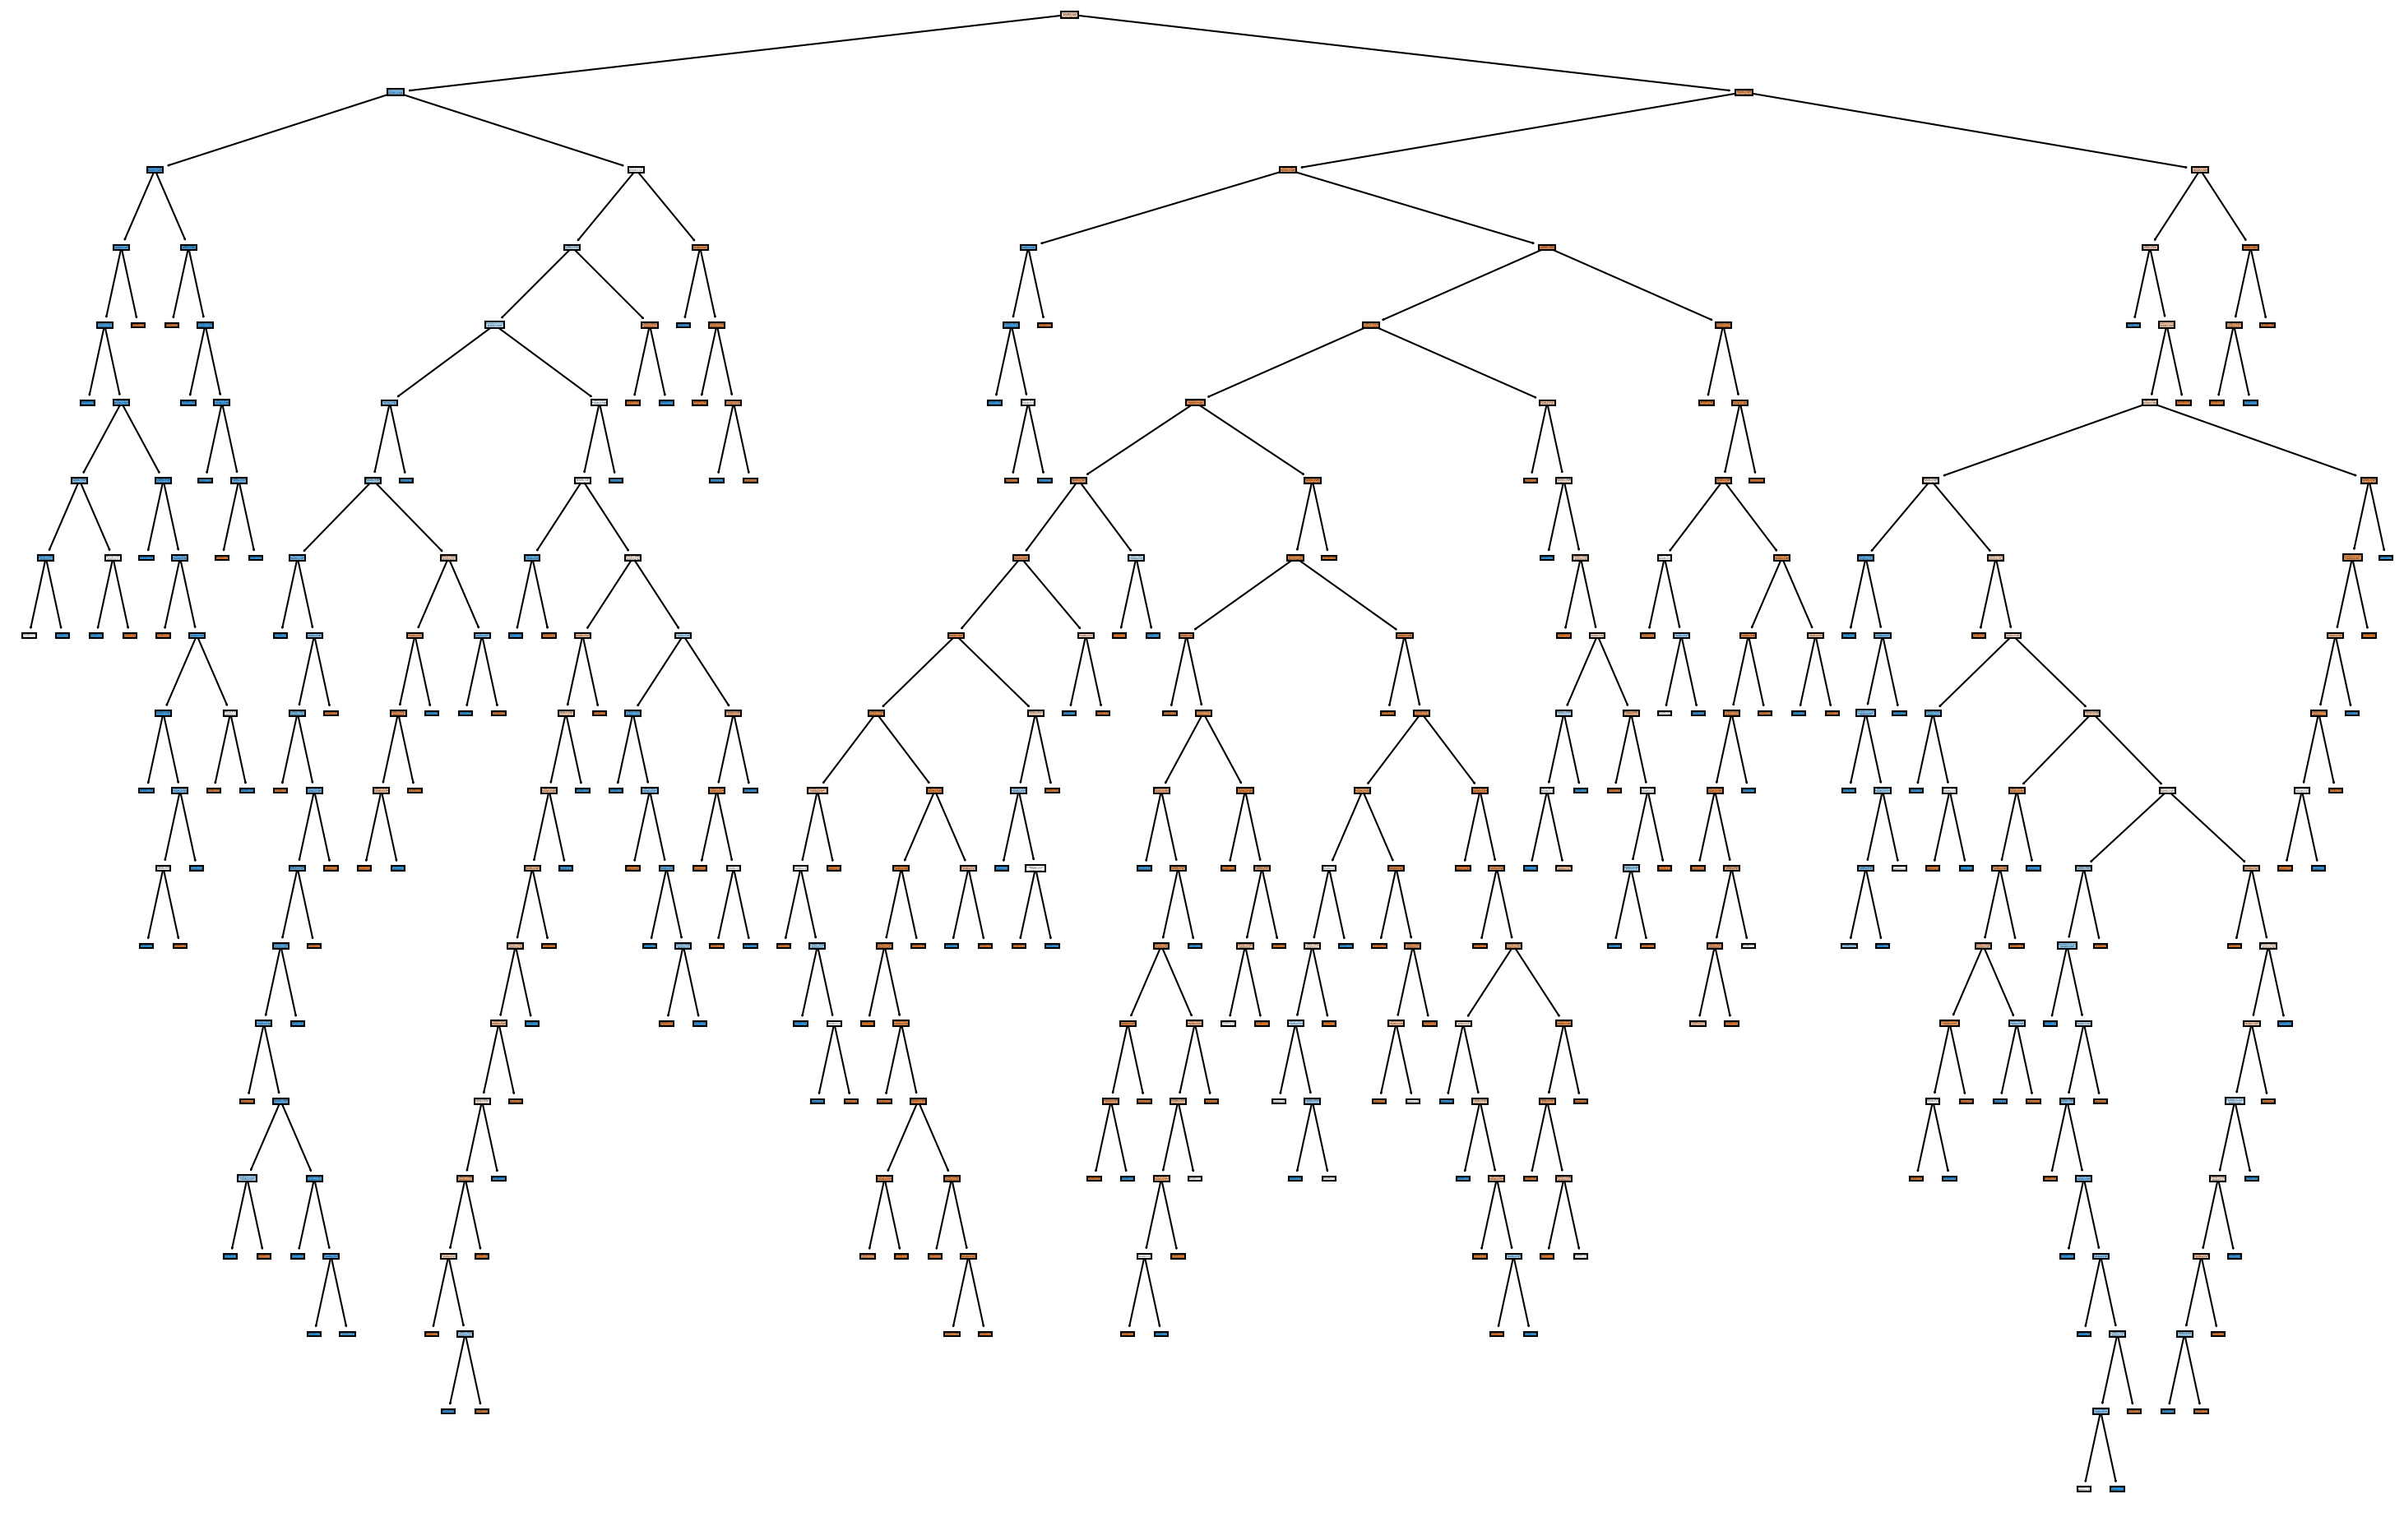

In [80]:
report_model(entropy_tree)